# Testing

## Error in Software

Cost of failure 2017:

- US$1.7 trillion in financial losses
- 3.6 billion people affected

Some software errors have caused considerable material and human damage.

Watch the following video, Top Ten Most Disastrous Software Bugs: https://www.youtube.com/watch?v=AGI371ht1N8

How can we avoid bugs?

Is it possible to build software without errors?

- No software is ever 100% bug-free.
- Building software is an ongoing process.
- Normal day for any developer is:
    1. Write code for one hour.
    2. Spend the rest of the day to fix it.

**Type of Errors**
- Syntax Errors (easy to fix)
- Run Time errors (bugs): (only show after running the program.)

**Run Time Errors**

- Logic errors (mistake in software flow)
- Calculation errors
- Unit-level bugs
- System-level integration bugs (two or more pieces of software from separate subsystems interact erroneously.)


**Software Testing**

Pro|Cons
---|----
Bugs will often be found before the software is released. | It takes extra time to test the software.

You can either manually or automatically test yous software. 

Automated Tests**
What are the advantages and disadvantages?

Pro|Cons
---|----
Run quickly by a computer. | The testing scripts have to be written.
Fantastic return on investment. |
Write them once, then run them many, many times.| The test code has to be maintained.
Help you to maintain your application|
Test can help other developers to understand the program, thus can act as a kind of documentation.| You have to be precise when you write the test scripts

TDD (Test Driven Development)

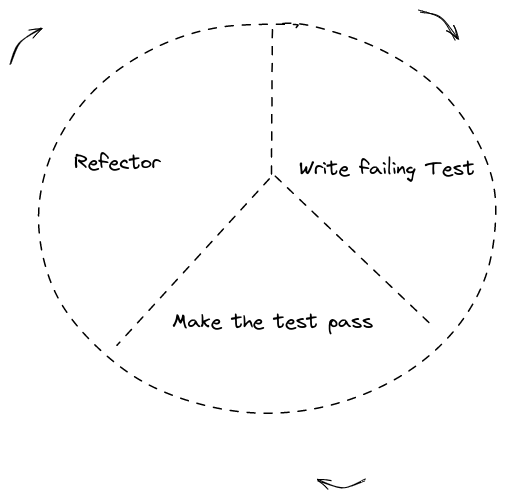

In [15]:
class CatController:
    def hourly_run(self, hour):
        if hour == 7:
            return 'Open cat cage.'
        elif hour in range(8, 12) or hour in range(13,20):
            return 'Give water.'
        return ''
        

Unit Test
- Test for a single unit (functions, methods)

In [16]:
WATER_HOURS = [8,9,10,11,13,14,15,16,17,18,19]

def main():
    test_failed = False
    error_msg = ''

    cat_controller = CatController()

    for hour in range(24):
        if hour in WATER_HOURS:
            if not "Give water." in cat_controller.hourly_run(hour):
                test_failed = True
                error_msg = "Failed to give water."
        elif "Give water." in cat_controller.hourly_run(hour):
            test_failed = True
            error_msg = "Should not give water."


        if not "Open cat cage." in cat_controller.hourly_run(7):
            test_failed = True
            error_msg = "Failed to open cage."

    return 'All test run successfully.' if not test_failed else error_msg

main()


'All test run successfully.'